# Rossler system Bifurcation analysis

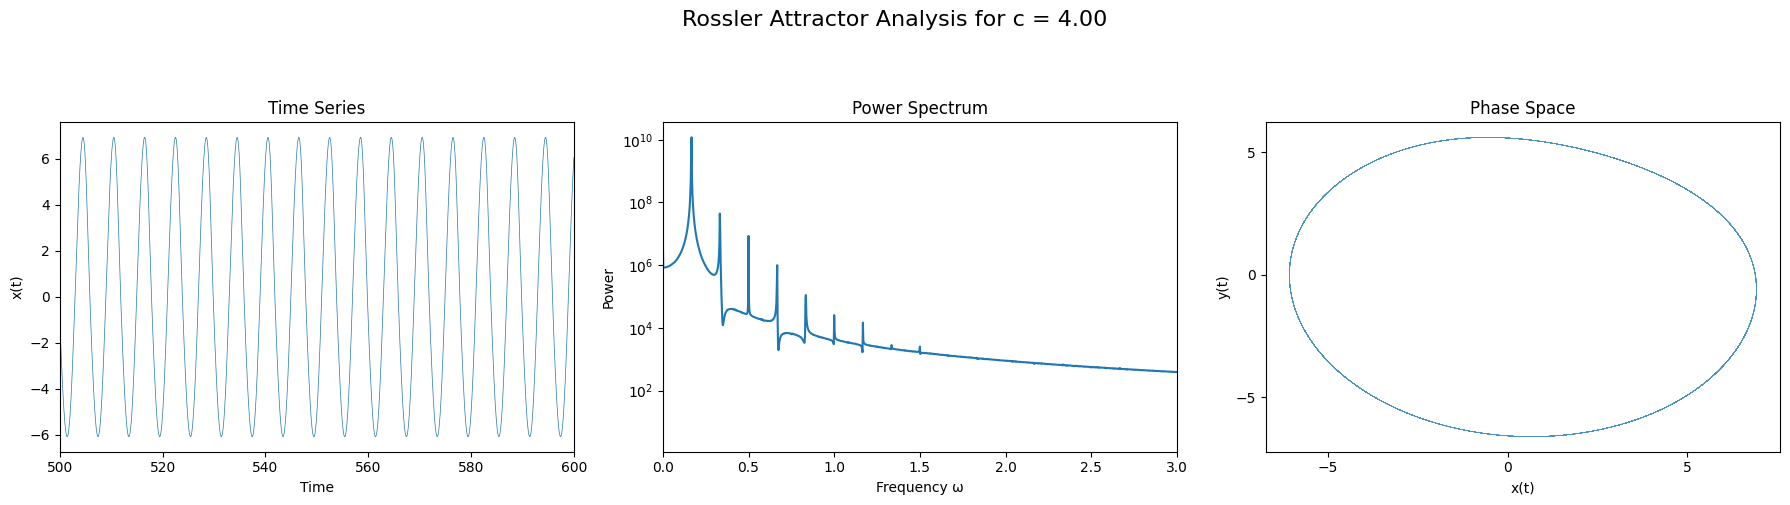

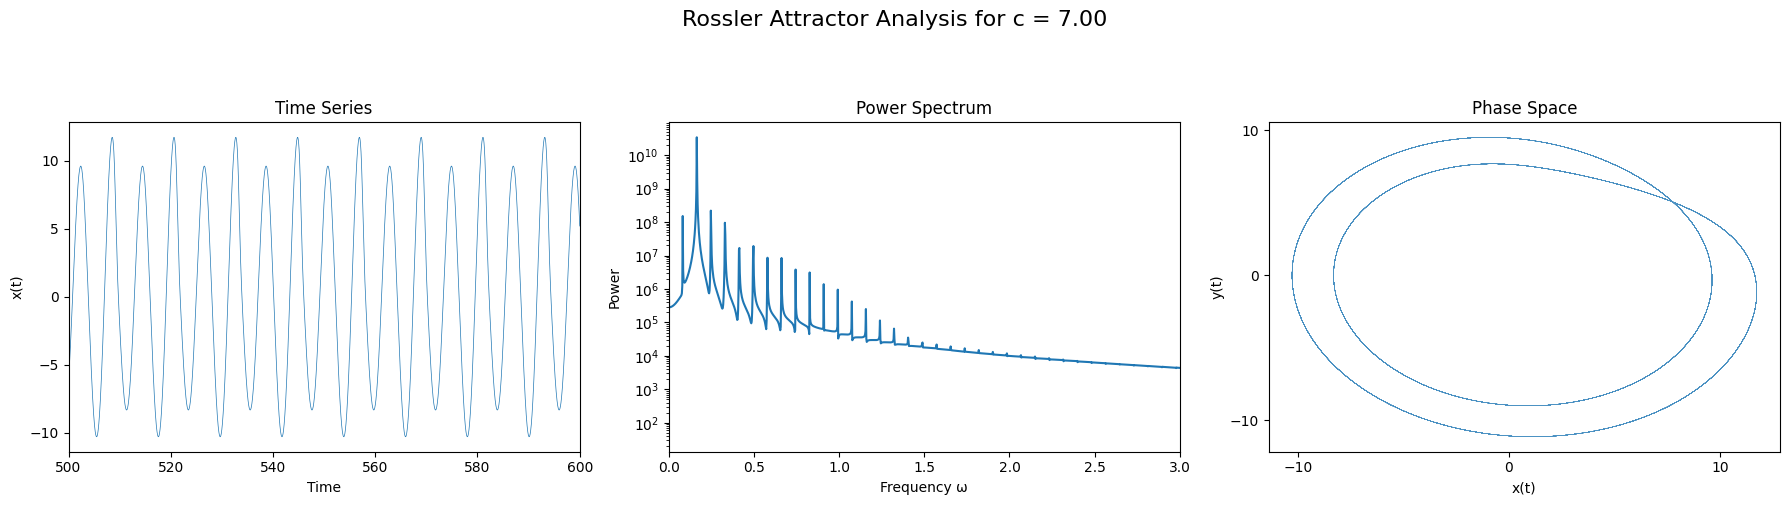

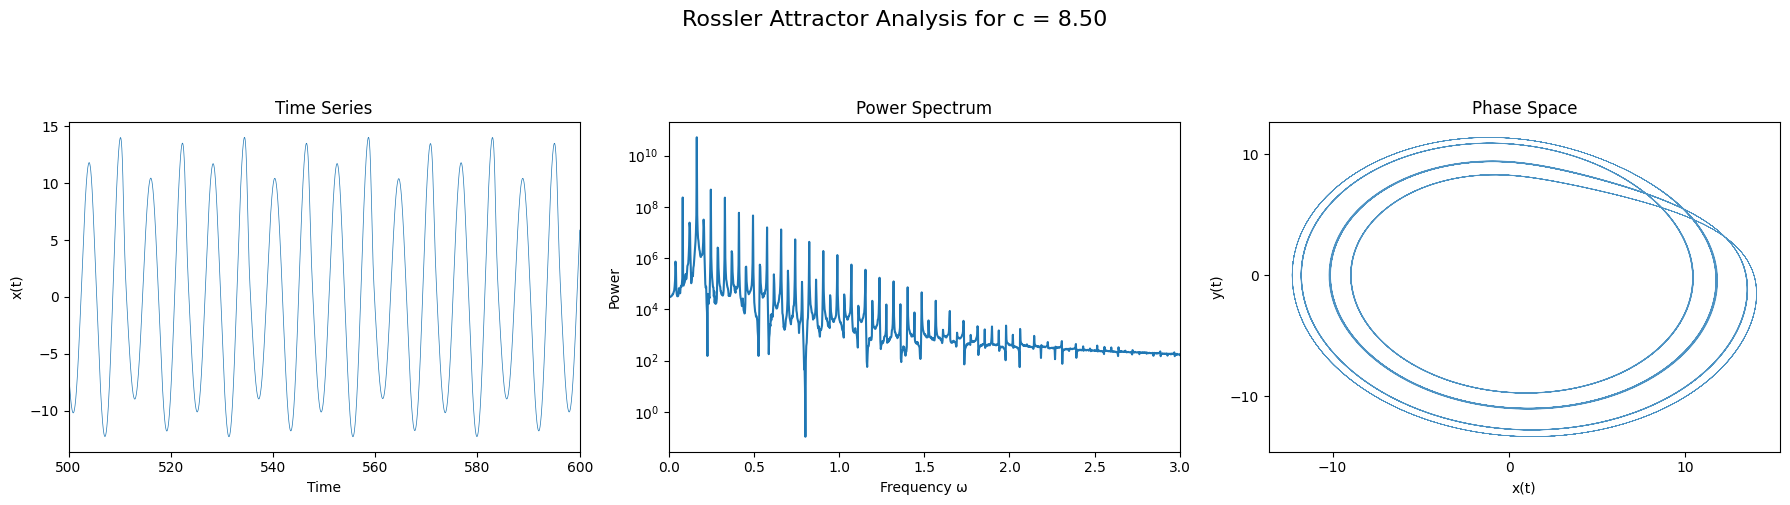

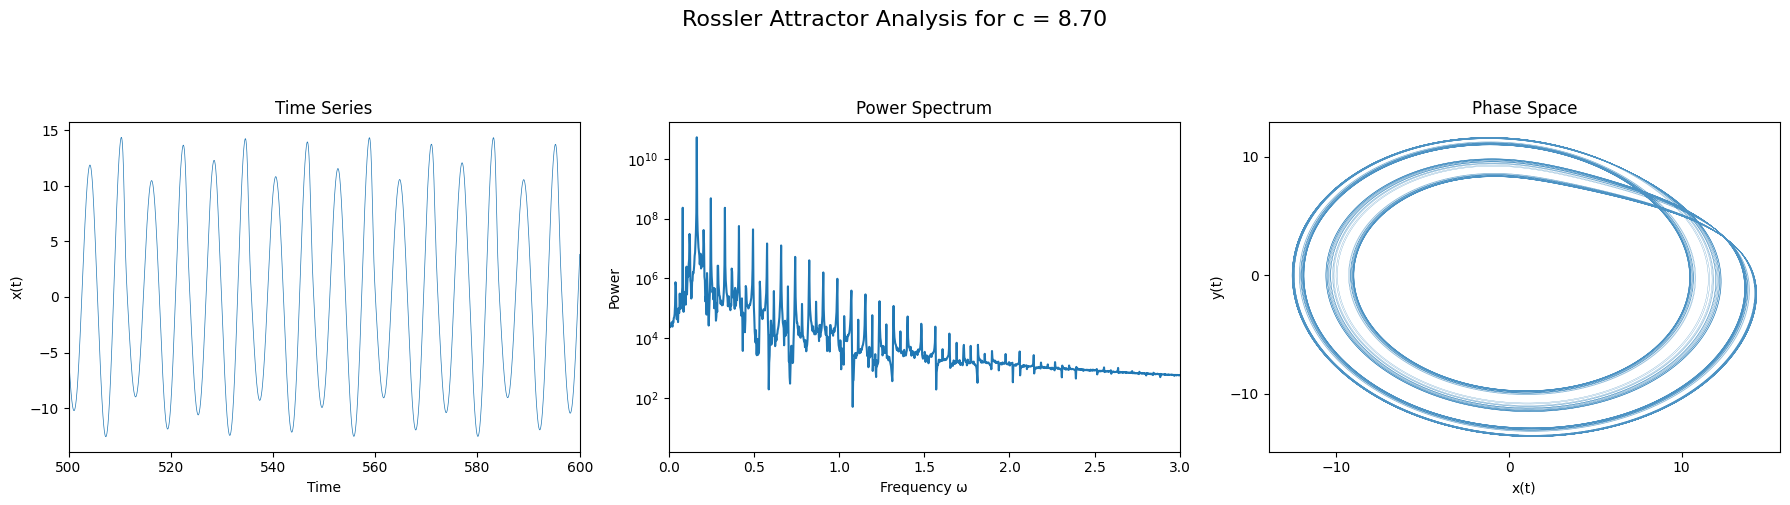

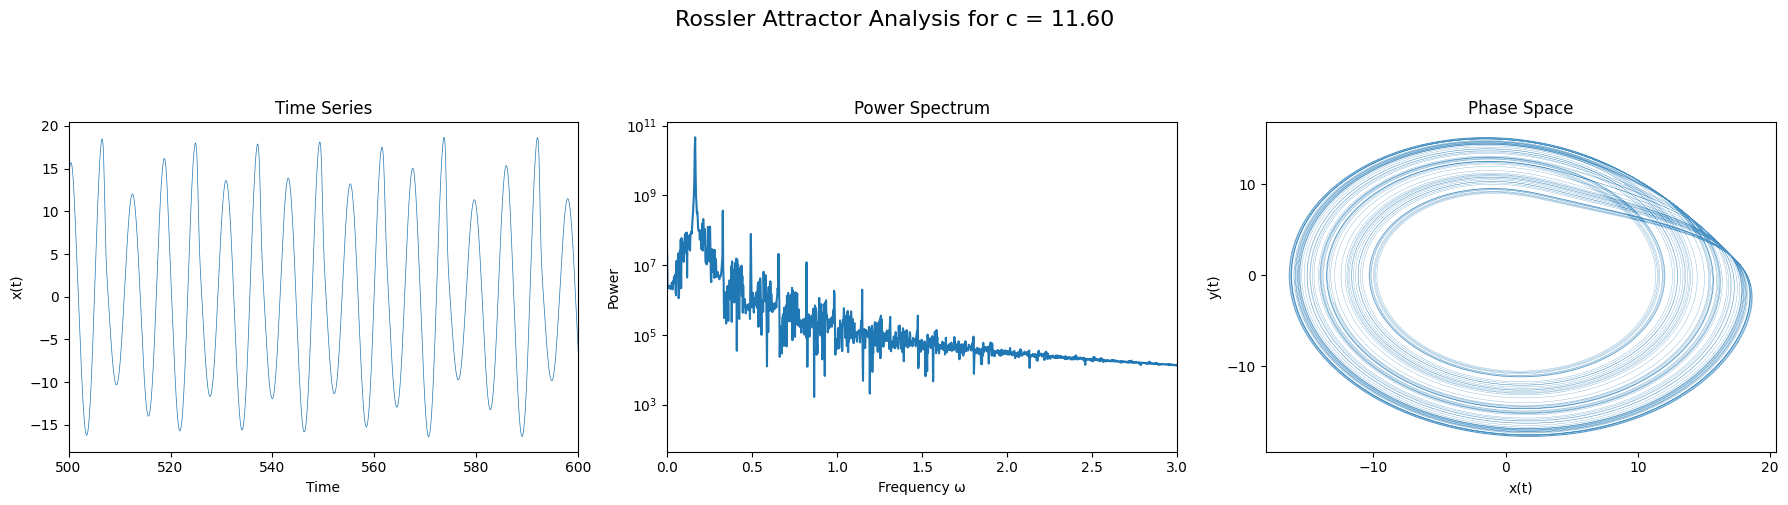

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# --- Define the system and helper functions ---
# (Using standard Rossler system definition)

def rossler_system(t, y, a, b, c):
    x, y, z = y
    dxdt = -y - z
    dydt = x + a * y
    dzdt = b + z * (x - c)
    return [dxdt, dydt, dzdt]

def spectrum(x, dt):
    # Use Fast Fourier Transform
    # We use rfft for real-valued input
    n = len(x)
    if n == 0:
        return np.array([0]), np.array([0])
        
    P = np.abs(np.fft.rfft(x))**2
    f = np.fft.rfftfreq(n, dt)
    
    # Return only positive frequencies (rfft convention)
    return f[:n//2], P[:n//2]

#parameters
a = 0.1
b = 0.1
c_values = [4, 7, 8.5, 8.7, 11.6]

# Time span and evaluation points
t_span = [0, 800]
#setting up points to evaluate the solution with a time gap of 0.01
t_eval = np.linspace(t_span[0], t_span[1], 80000)
dt = t_eval[1] - t_eval[0]

# Index to start from to remove transient behavior
transient_index = 40000

# --- Loop, solve, and create a separate plot for each 'c' value ---

for c in c_values:
    
    # Solve the differential equation
    sol = solve_ivp(rossler_system, t_span, [1, 1, 1], t_eval=t_eval, args=(a, b, c), method='RK45')

    # Get data and remove transient
    x = sol.y[0][transient_index:]
    y = sol.y[1][transient_index:]
    t = sol.t[transient_index:]

    # Calculate power spectrum
    f, P = spectrum(x, dt)

    # --- Plotting ---

    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    

    fig.suptitle(f'Rossler Attractor Analysis for c = {c:.2f}', fontsize=16, y=1.03)

    # Plot 1: Time series
    axs[0].plot(t, x, lw=0.5)
    axs[0].set_title('Time Series')
    axs[0].set_xlabel('Time')
    axs[0].set_ylabel('x(t)')
    axs[0].set_xlim(500, 600)
    
    # Plot 2: Power spectrum
    if f.size > 0:
        axs[1].plot(f, P)
        axs[1].set_title('Power Spectrum')
        axs[1].set_xlabel('Frequency ω')
        axs[1].set_ylabel('Power')
        axs[1].set_yscale('log')
        axs[1].set_xlim(0, 3)
    
    # Plot 3: Phase space
    axs[2].plot(x, y, lw=0.2, alpha=0.8) 
    axs[2].set_title('Phase Space')
    axs[2].set_xlabel('x(t)')
    axs[2].set_ylabel('y(t)')

    axs[2].locator_params(axis='x', nbins=4)
    axs[2].locator_params(axis='y', nbins=4)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()









# Lorenz system(intermittency chaos)

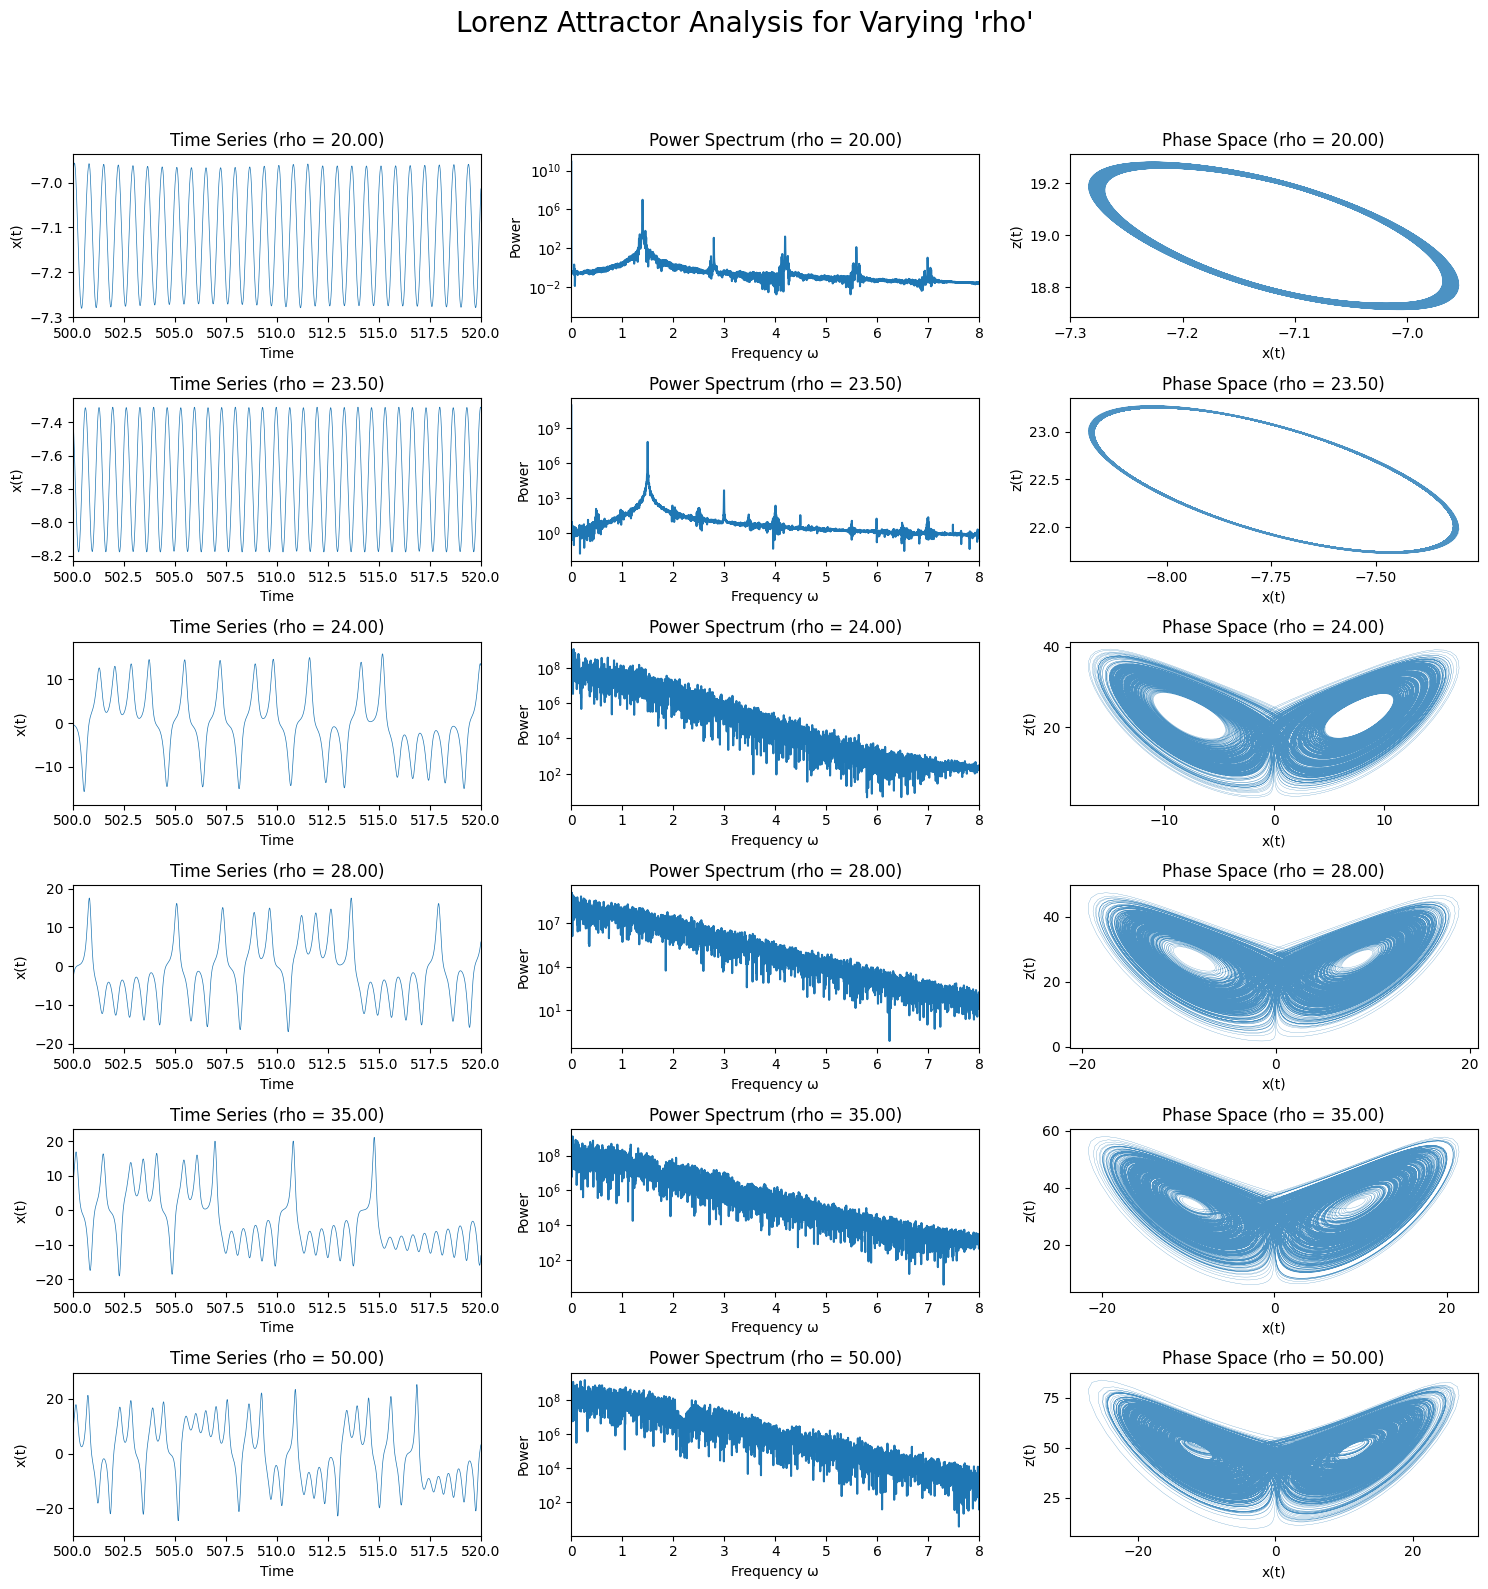

In [31]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# --- Define the system and helper functions ---

def lorenz_system(t, y, sigma, rho, beta):
    x, y, z = y
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

def spectrum(x, dt):
    # Use Fast Fourier Transform
    # We use rfft for real-valued input
    n = len(x)
    if n == 0:
        return np.array([0]), np.array([0])
        
    P = np.abs(np.fft.rfft(x))**2
    f = np.fft.rfftfreq(n, dt)
    
    # Return only positive frequencies (rfft convention)
    return f[:n//2], P[:n//2]

# --- Set up parameters ---

# Standard Lorenz parameters
sigma = 10.0
beta = 8.0 / 3.0
# Create an array of 6 different 'rho' values to plot

rho_values = [20, 23.5, 24, 28, 35, 50]

t_span = [0, 800]
t_eval = np.linspace(t_span[0], t_span[1], 80000)
dt = t_eval[1] - t_eval[0]

transient_index = 40000

# --- Create the plot ---

fig, axs = plt.subplots(6, 3, figsize=(15, 16))

# Adjust spacing
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Loop over the 6 'rho' values
for i, rho in enumerate(rho_values):
    

    sol = solve_ivp(lorenz_system, t_span, [1, 1, 1], t_eval=t_eval, args=(sigma, rho, beta), method='RK45')
    

    # Get data and remove transient
    x = sol.y[0][transient_index:]
    y = sol.y[1][transient_index:]
    z = sol.y[2][transient_index:] # Get z-component for phase space plot
    t = sol.t[transient_index:]
    
    # Calculate power spectrum (based on x component)
    f, P = spectrum(x, dt)

    # --- Plotting ---
    
    # Time series (x vs t)
    axs[i,0].plot(t, x, lw=0.5)
    axs[i,0].set_title(f'Time Series (rho = {rho:.2f})')
    axs[i,0].set_xlabel('Time')
    axs[i,0].set_ylabel('x(t)')
    axs[i,0].set_xlim(500, 520) 
    
    # Power spectrum
    if f.size > 0:
        axs[i,1].plot(f, P)
        axs[i,1].set_title(f'Power Spectrum (rho = {rho:.2f})')
        axs[i,1].set_xlabel('Frequency ω')
        axs[i,1].set_ylabel('Power')

        axs[i,1].set_yscale('log')
        axs[i,1].set_xlim(0,8) 
    
    # Phase space 
    axs[i,2].plot(x, z, lw=0.2, alpha=0.8) 
    axs[i,2].set_title(f'Phase Space (rho = {rho:.2f})')
    axs[i,2].set_xlabel('x(t)')
    axs[i,2].set_ylabel('z(t)') 
    axs[i,2].locator_params(axis='x', nbins=4)
    axs[i,2].locator_params(axis='y', nbins=4)



fig.suptitle('Lorenz Attractor Analysis for Varying \'rho\'', fontsize=20, y=1.02)

plt.tight_layout(rect=[0, 0.03, 1, 0.98])

plt.show()

# Driven Van der Pol system (quasiperiodic chaos)

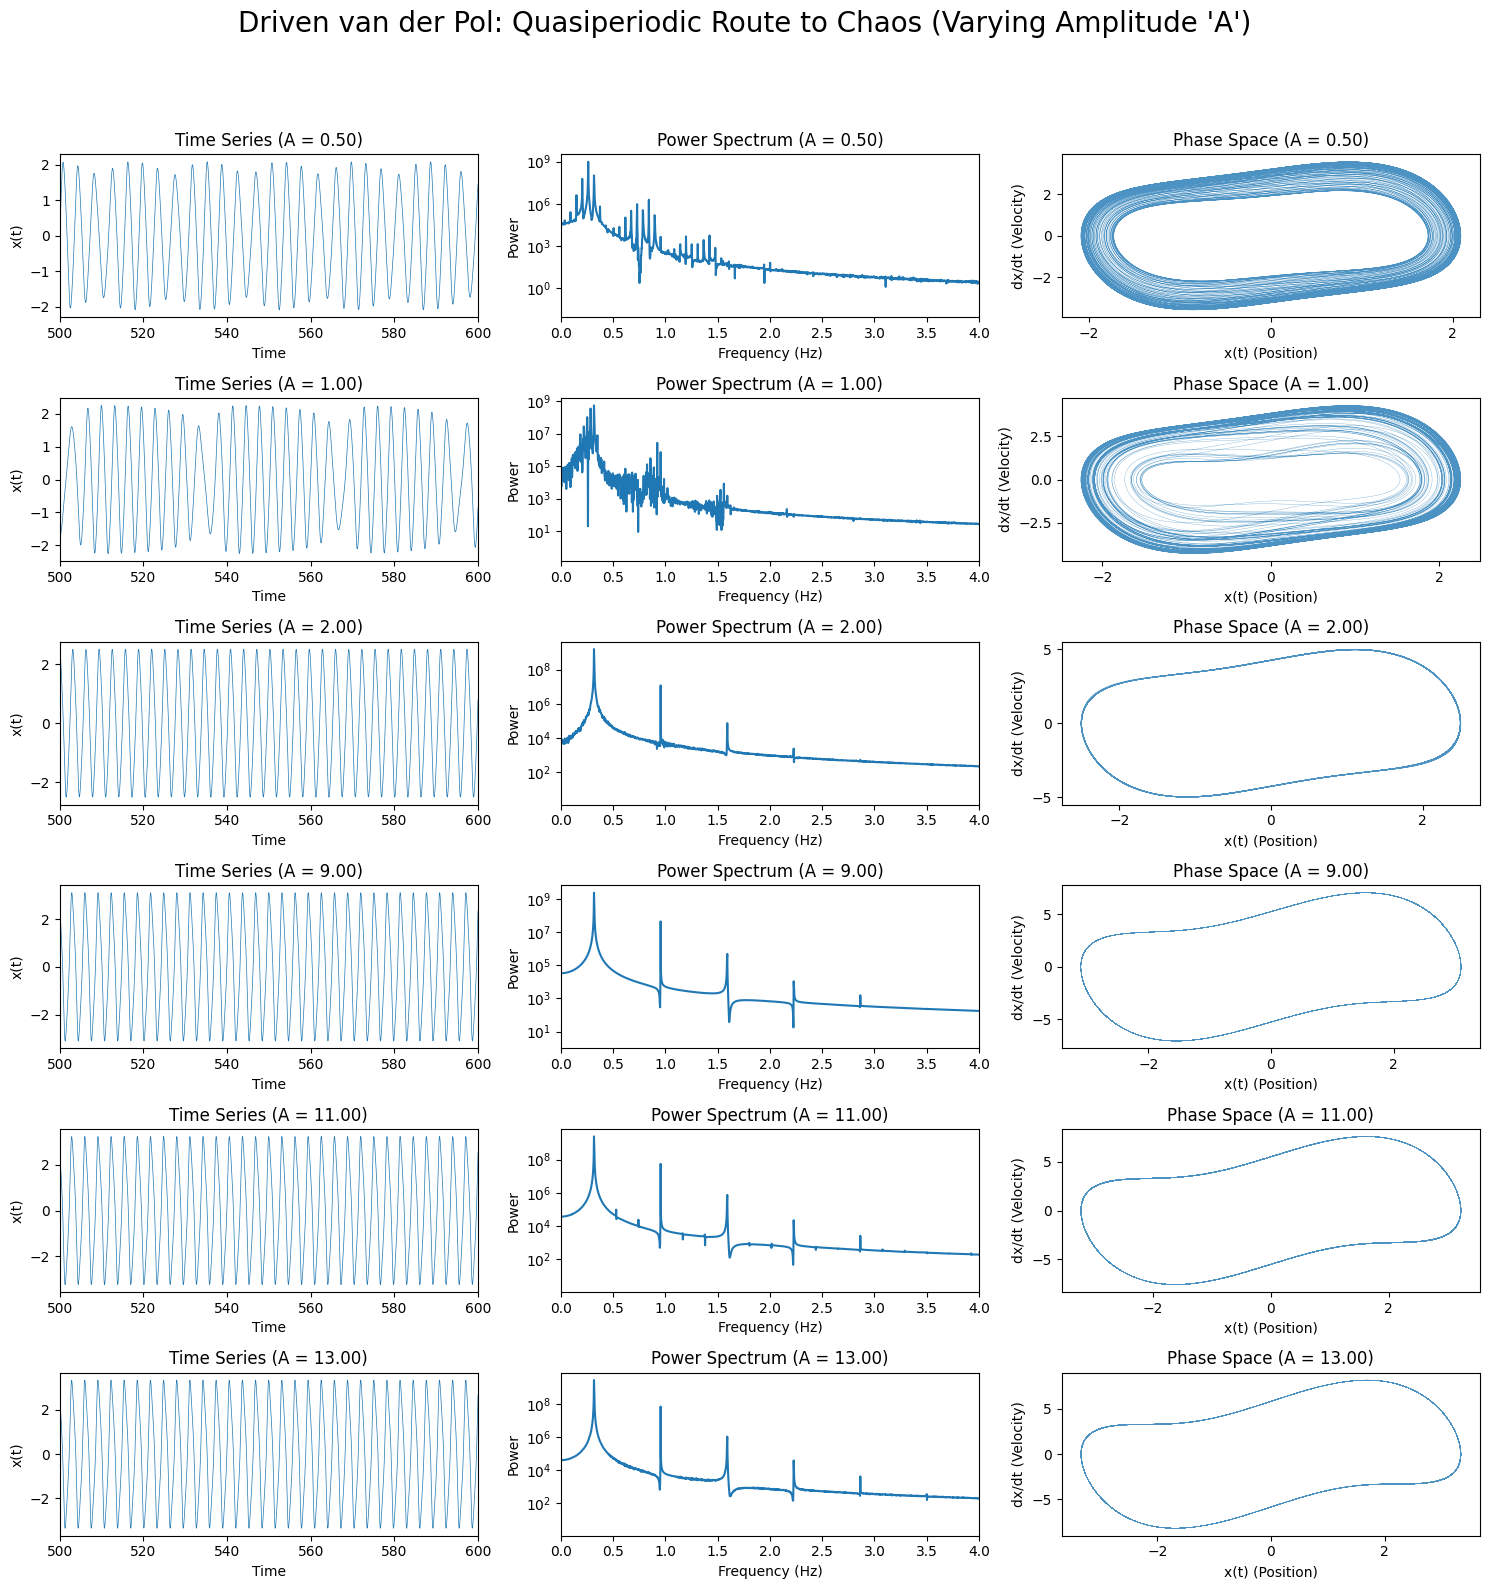

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# --- Define the system and helper functions ---

def driven_vdp_system(t, y, mu, A, omega):
    """
    Equation: d²x/dt² - mu(1 - x²)dx/dt + x = A cos(omega*t)
    System:
    dx/dt = y
    dy/dt = mu(1 - x²)y - x + A cos(omega*t)
    """
    x, y_vdp = y  # y_vdp is dx/dt
    dxdt = y_vdp
    dydt = mu * (1 - x**2) * y_vdp - x**3 + A * np.cos(omega * t)
    return [dxdt, dydt]

def spectrum(x, dt):
    # Use Fast Fourier Transform
    # We use rfft for real-valued input
    n = len(x)
    if n == 0:
        return np.array([0]), np.array([0])
        
    P = np.abs(np.fft.rfft(x))**2
    f = np.fft.rfftfreq(n, dt)
    
    # Return only positive frequencies (rfft convention)
    return f[:n//2], P[:n//2]

# --- Set up parameters ---

# van der Pol parameters
mu = 0.5     # Non-linearity coefficient
omega = 2   # Driving (angular) frequency
# We will vary the driving amplitude 'A'
# This range is chosen to show the transition from periodic to quasiperiodic to chaos
A_values = [0.5, 1, 2.0, 9.0, 11.0, 13.0]

# Time span and evaluation points
t_span = [0, 800]
# Increase evaluation points for smoother plots and to avoid empty data after transient removal
t_eval = np.linspace(t_span[0], t_span[1], 80000)
dt = t_eval[1] - t_eval[0]

# Index to start from to remove transient behavior
transient_index = 40000

# --- Create the plot ---

fig, axs = plt.subplots(6, 3, figsize=(15, 16))

# Adjust spacing
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Loop over the 6 'A' (Amplitude) values
for i, A in enumerate(A_values):
    
    # Solve the differential equation
    # Initial state is 2D: [x, y]
    sol = solve_ivp(driven_vdp_system, t_span, [0,0], t_eval=t_eval, args=(mu, A, omega), method='RK45')
    

    # Get data and remove transient
    x = sol.y[0][transient_index:]
    y = sol.y[1][transient_index:] # This is dx/dt
    t = sol.t[transient_index:]
    
    # Calculate power spectrum (based on x component)
    f, P = spectrum(x, dt)

    # --- Plotting ---
    
    # Time series (x vs t)
    axs[i,0].plot(t, x, lw=0.5)
    axs[i,0].set_title(f'Time Series (A = {A:.2f})')
    axs[i,0].set_xlabel('Time')
    axs[i,0].set_ylabel('x(t)')
    axs[i,0].set_xlim(500, 600) 
    
    # Power spectrum
    if f.size > 0:
        axs[i,1].plot(f, P)
        axs[i,1].set_title(f'Power Spectrum (A = {A:.2f})')
        axs[i,1].set_xlabel('Frequency (Hz)')
        axs[i,1].set_ylabel('Power')
        axs[i,1].set_yscale('log')
        # f_drive = omega / (2*pi) approx 0.38 Hz
        # f_nat is also in this range
        axs[i,1].set_xlim(0, 4.0) # Zoom in on the relevant frequencies
    
    # Phase space (Plotting x vs dx/dt)
    # A simple loop = periodic
    # A filled torus = quasiperiodic
    # A "mess" = chaotic
    axs[i,2].plot(x, y, lw=0.2, alpha=0.8) 
    axs[i,2].set_title(f'Phase Space (A = {A:.2f})')
    axs[i,2].set_xlabel('x(t) (Position)')
    axs[i,2].set_ylabel('dx/dt (Velocity)')
    axs[i,2].locator_params(axis='x', nbins=4)
    axs[i,2].locator_params(axis='y', nbins=4)



fig.suptitle("Driven van der Pol: Quasiperiodic Route to Chaos (Varying Amplitude 'A')", fontsize=20, y=1.02)

plt.tight_layout(rect=[0, 0.03, 1, 0.98])

plt.show()

In [ ]:
#fft
def fft(x):
    n=len(x)
    if n==1:
        return x
    
 
    even = fft(x[0::2])
    odd = fft(x[1::2])

    out=[0]*n
    omega = np.exp(1j*2*np.pi/n)
    for i in range(n//2):
        out[i] = even[i] + omega**(i) * odd[i]
        out[i + n // 2] = even[i] - omega**(i) * odd[i]

    return out

def fft(x):
    """
    A recursive implementation of the 1D Cooley-Tukey FFT.
    Assumes n is a power of 2.
    """
    n = len(x)
    
    if n == 1:
        return x

    even = fft(x[0::2])
    odd = fft(x[1::2])

    out = np.zeros(n, dtype=complex)
    omega_base = np.exp(-2j * np.pi / n)
    
    for i in range(n // 2):
        omega_i = omega_base**i
        term = omega_i * odd[i]
        
        out[i]          = even[i] + term
        out[i + n // 2] = even[i] - term

    return out


def plot_power_spectrum(t, x_orig):
    """
    Wraps the entire process:
    1. Infers sample rate (fs) from the time array (t).
    2. TRUNCATES the signal down to a power of 2.
    3. Computes the FFT using the fft() function.
    4. Calculates and plots the power spectrum.
    """
    
    ## 1. Infer Sample Rate and dt
    dt = t[1] - t[0]
    fs = 1.0 / dt
    
    print(f"Inferred sample rate fs: {fs:.2f} Hz")
    
    ## 2. Truncate Signal to a Power of 2
    n_orig = len(x_orig)
    # Find the *previous* power of 2
    n_truncated = int(2**np.floor(np.log2(n_orig))) 
    
    # Slice the array to the new, shorter length
    x_truncated = x_orig[:n_truncated]
    t_truncated = t[:n_truncated] # Also slice the time array
    
    print(f"Original signal length: {n_orig}, Truncated to: {n_truncated}")
    
    # Check if we have enough data (at least 2 samples)
    if n_truncated < 2:
        print("Error: Signal too short to truncate to a power of 2.")
        return

    ## 3. Compute the FFT
    # We must use complex type for the fft function
    F = fft(x_truncated.astype(complex))

    ## 4. Calculate the Power Spectrum
    power = np.abs(F)**2

    ## 5. Prepare Frequency Axis
    frequencies = np.fft.fftfreq(n_truncated, d=dt)
    
    freq_shifted = np.fft.fftshift(frequencies)
    power_shifted = np.fft.fftshift(power)

    ## 6. Plot the Results
    plt.figure(figsize=(12, 6))

    # Plot the (truncated) signal
    plt.subplot(2, 1, 1)
    plt.plot(t_truncated, x_truncated.real, 
             label=f"Signal (truncated from {n_orig})", color='red')
    plt.title("Input Signal (Truncated)")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(True)

    # Plot the power spectrum
    plt.subplot(2, 1, 2)
    plt.plot(freq_shifted, power_shifted)
    plt.title("Power Spectrum (from Truncated Signal)")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Power")
    plt.grid(True)
    plt.xlim(0, 4) 
    # plt.ylim(bottom=0)
    plt.yscale('log')

    plt.tight_layout()
    plt.show()
    
    return F, freq_shifted, power_shifted

